In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import visualkeras
from PIL import ImageFont

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Model Architecture (AlenNet) with named layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='Conv2D_1'))
model.add(MaxPooling2D((2, 2), name='MaxPooling2D_1'))
model.add(Conv2D(64, (3, 3), activation='relu', name='Conv2D_2'))
model.add(MaxPooling2D((2, 2), name='MaxPooling2D_2'))
model.add(Conv2D(64, (3, 3), activation='relu', name='Conv2D_3'))
model.add(Flatten(name='Flatten'))
model.add(Dense(64, activation='relu', name='Dense_1'))
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()

c:\Users\hariv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D_1 (MaxPooling2D)   │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D_2 (MaxPooling2D)   │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_3 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:


# Model Training (unchanged)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Save the model (unchanged)
model.save('model.h5')



Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8923 - loss: 0.3390 - val_accuracy: 0.9849 - val_loss: 0.0445
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9858 - loss: 0.0453 - val_accuracy: 0.9868 - val_loss: 0.0431
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 0.9902 - val_loss: 0.0306
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9929 - loss: 0.0234 - val_accuracy: 0.9908 - val_loss: 0.0305
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9902 - val_loss: 0.0301
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9957 - loss: 0.0138 - val_accuracy: 0.9901 - val_loss: 0.0308
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9955 - loss: 0.0137 - val_accuracy: 0.9902 - val_loss: 0.0351
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9968 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


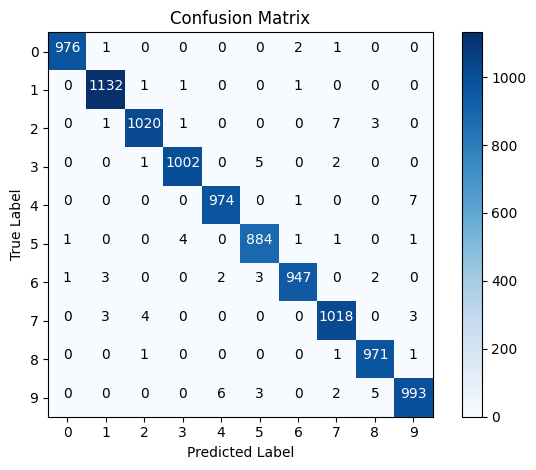

In [6]:
# Get predictions for test data
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to label encoding
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot values inside the matrix
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [7]:
# Calculate TP, TN, FP, FN
TP = np.diag(confusion_mtx)
TN = np.sum(confusion_mtx) - np.sum(confusion_mtx, axis=0) - np.sum(confusion_mtx, axis=1) + TP
FP = np.sum(confusion_mtx, axis=0) - TP
FN = np.sum(confusion_mtx, axis=1) - TP

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

# Print TP, TN, FP, FN, precision, recall, and F1 score for each class
for i in range(10):
    print("Class {}: TP = {}, TN = {}, FP = {}, FN = {}, Precision = {:.4f}, Recall = {:.4f}, F1 Score = {:.4f}"
          .format(i, TP[i], TN[i], FP[i], FN[i], precision[i], recall[i], f1[i]))


Class 0: TP = 976, TN = 9018, FP = 2, FN = 4, Precision = 0.9980, Recall = 0.9959, F1 Score = 0.9969
Class 1: TP = 1132, TN = 8857, FP = 8, FN = 3, Precision = 0.9930, Recall = 0.9974, F1 Score = 0.9952
Class 2: TP = 1020, TN = 8961, FP = 7, FN = 12, Precision = 0.9932, Recall = 0.9884, F1 Score = 0.9908
Class 3: TP = 1002, TN = 8984, FP = 6, FN = 8, Precision = 0.9940, Recall = 0.9921, F1 Score = 0.9931
Class 4: TP = 974, TN = 9010, FP = 8, FN = 8, Precision = 0.9919, Recall = 0.9919, F1 Score = 0.9919
Class 5: TP = 884, TN = 9097, FP = 11, FN = 8, Precision = 0.9877, Recall = 0.9910, F1 Score = 0.9894
Class 6: TP = 947, TN = 9037, FP = 5, FN = 11, Precision = 0.9947, Recall = 0.9885, F1 Score = 0.9916
Class 7: TP = 1018, TN = 8958, FP = 14, FN = 10, Precision = 0.9864, Recall = 0.9903, F1 Score = 0.9883
Class 8: TP = 971, TN = 9016, FP = 10, FN = 3, Precision = 0.9898, Recall = 0.9969, F1 Score = 0.9934
Class 9: TP = 993, TN = 8979, FP = 12, FN = 16, Precision = 0.9881, Recall = 0.98

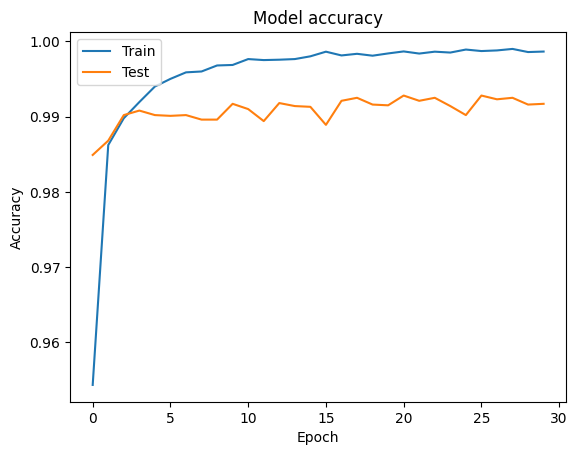

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

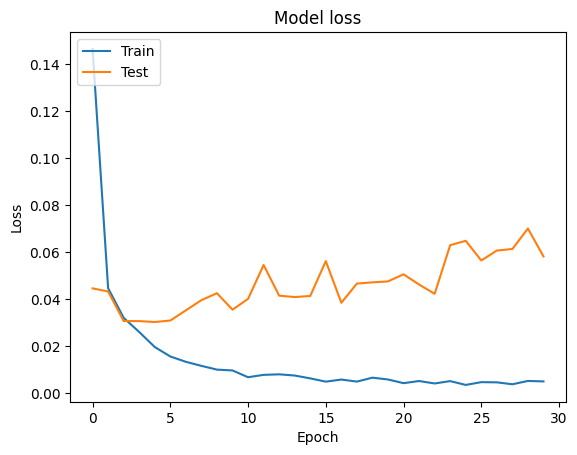

In [9]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


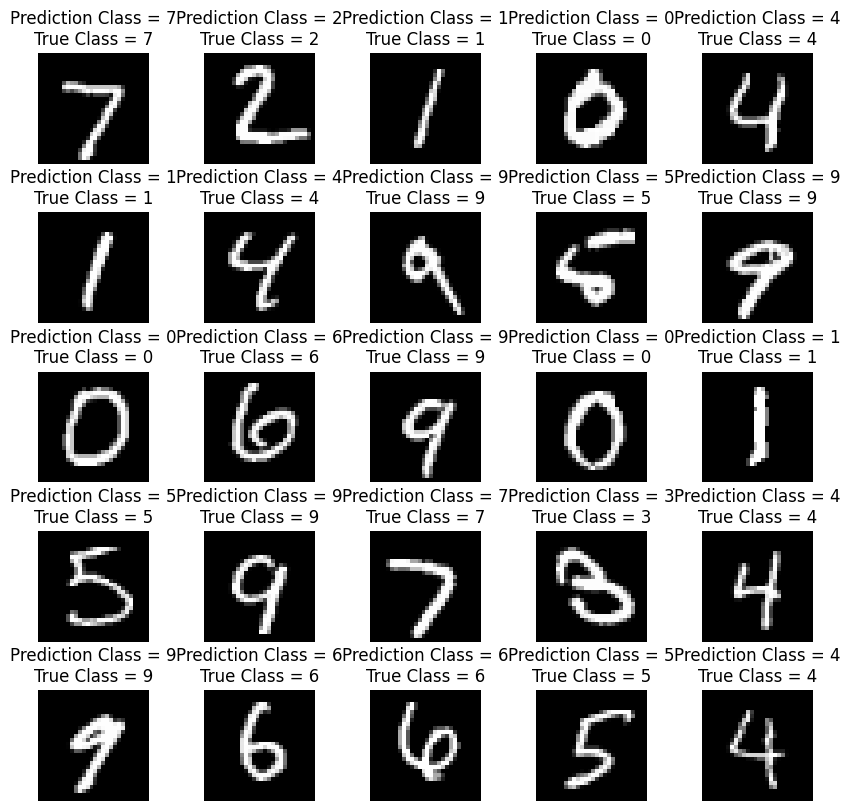

In [10]:
# Plot sample predictions
preds = model.predict(X_test)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title("Prediction Class = {}\nTrue Class = {}".format(np.argmax(preds[i]), np.argmax(y_test[i])))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

c:\Users\hariv\AppData\Local\Programs\Python\Python311\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


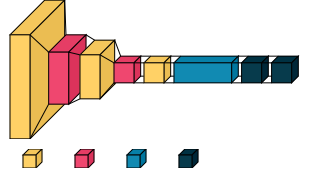

In [11]:
# Visualize the model architecture
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font)

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)
print('Test loss:', loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9897 - loss: 0.0677
Test accuracy: 0.9916999936103821
Test loss: 0.058043159544467926
